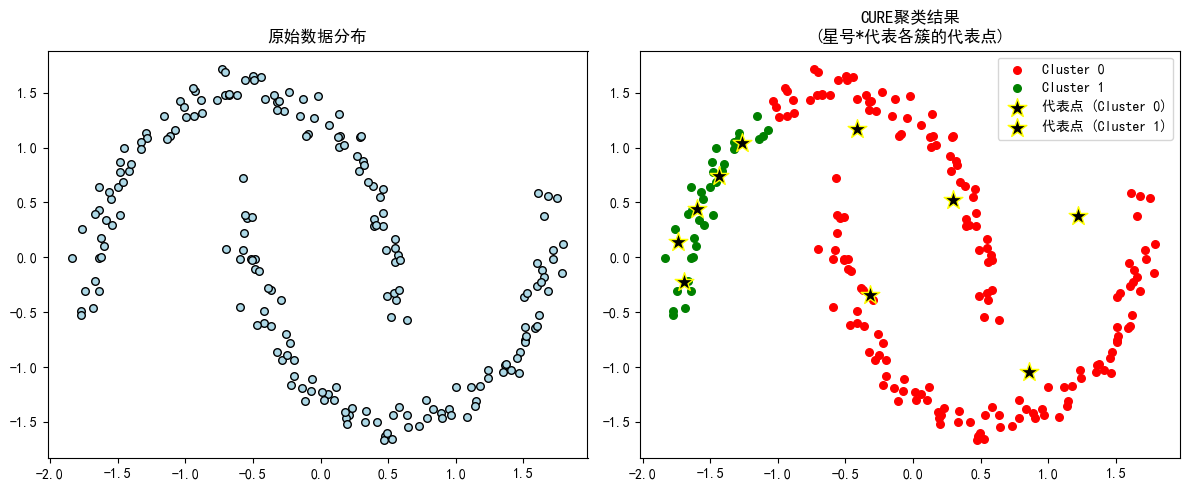

In [7]:
# 1. 环境准备
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from pyclustering.cluster import cure
from sklearn.preprocessing import StandardScaler

plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体为黑体
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题

# 2. 生成测试数据（半月形+球形混合）
X_moons, _ = make_moons(n_samples=200, noise=0.05, random_state=42)
X = StandardScaler().fit_transform(X_moons)  # 只使用半月形数据更直观

# 3. CURE聚类实现
cure_instance = cure.cure(
    data=X.tolist(),
    number_cluster=2,
    number_represent_points=5,
    compression=0.3
)
cure_instance.process()
clusters = cure_instance.get_clusters()

# 4. 静态可视化（修正版）
plt.figure(figsize=(12, 5))

# 4.1 绘制原始数据
plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c='lightblue', s=30, edgecolor='k')
plt.title("原始数据分布")

# 4.2 绘制CURE聚类结果
plt.subplot(122)
colors = ['red', 'green']
for i, cluster in enumerate(clusters):
    plt.scatter(X[cluster, 0], X[cluster, 1], 
                c=colors[i], s=30, label=f'Cluster {i}')

# 绘制代表点（修正语法错误）
representors = cure_instance.get_representors()
for i, reps in enumerate(representors):
    reps_array = np.array(reps)
    plt.scatter(reps_array[:, 0], reps_array[:, 1], 
                c='black', marker='*', s=200, 
                edgecolor='yellow', linewidth=1,
                label=f'代表点 (Cluster {i})')

plt.legend()
plt.title("CURE聚类结果\n(星号*代表各簇的代表点)")
plt.tight_layout()
plt.show()

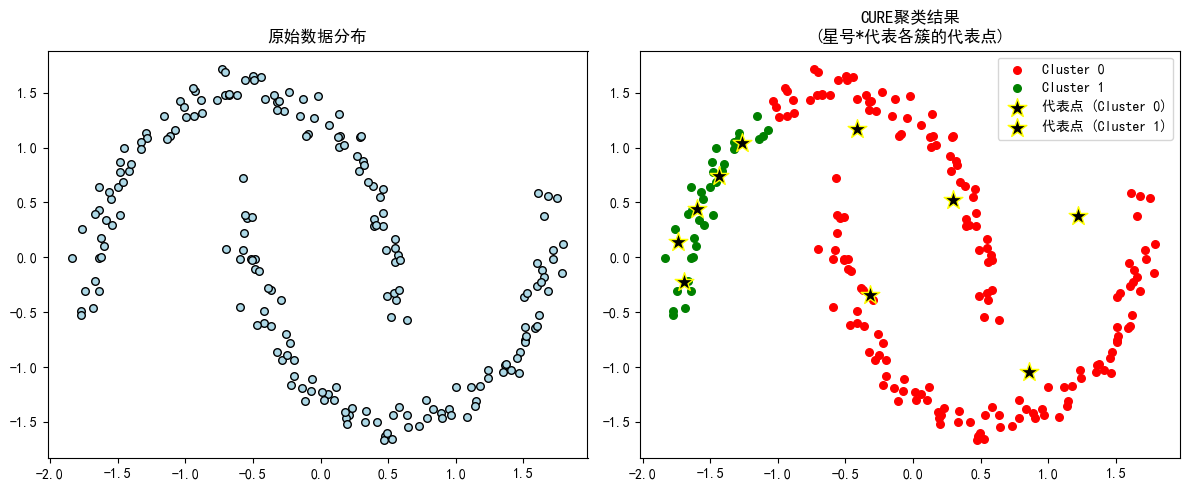

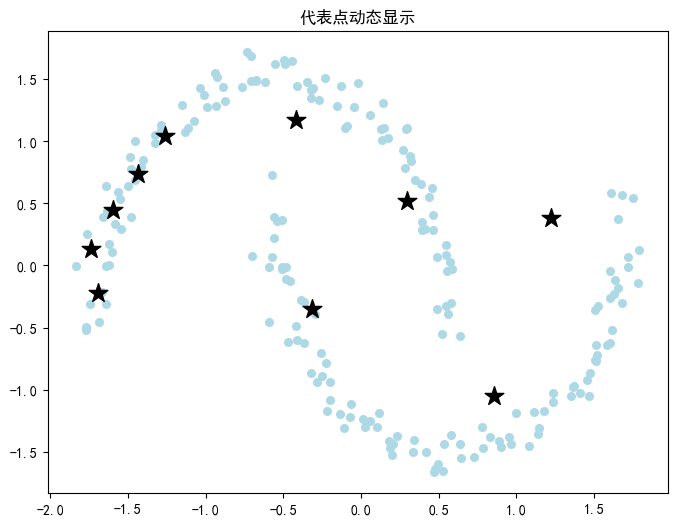

In [9]:
# 1. 环境准备
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from pyclustering.cluster import cure
from sklearn.preprocessing import StandardScaler

plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体为黑体
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题

# 2. 生成测试数据（半月形+球形混合）
X_moons, _ = make_moons(n_samples=200, noise=0.05, random_state=42)
X = StandardScaler().fit_transform(X_moons)  # 只使用半月形数据更直观

# 3. CURE聚类实现
cure_instance = cure.cure(
    data=X.tolist(),
    number_cluster=2,
    number_represent_points=5,
    compression=0.3
)
cure_instance.process()
clusters = cure_instance.get_clusters()

# 4. 静态可视化（修正版）
plt.figure(figsize=(12, 5))

# 4.1 绘制原始数据
plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c='lightblue', s=30, edgecolor='k')
plt.title("原始数据分布")

# 4.2 绘制CURE聚类结果
plt.subplot(122)
colors = ['red', 'green']
for i, cluster in enumerate(clusters):
    plt.scatter(X[cluster, 0], X[cluster, 1], 
                c=colors[i], s=30, label=f'Cluster {i}')

# 绘制代表点（修正语法错误）
representors = cure_instance.get_representors()
for i, reps in enumerate(representors):
    reps_array = np.array(reps)
    plt.scatter(reps_array[:, 0], reps_array[:, 1], 
                c='black', marker='*', s=200, 
                edgecolor='yellow', linewidth=1,
                label=f'代表点 (Cluster {i})')

plt.legend()
plt.title("CURE聚类结果\n(星号*代表各簇的代表点)")
plt.tight_layout()
plt.show()


fig, ax = plt.subplots(figsize=(8, 6))
scat = ax.scatter(X[:, 0], X[:, 1], c='lightblue', s=30)
rep_points = ax.scatter([], [], c='black', marker='*', s=200)

def init():
    rep_points.set_offsets(np.empty((0, 2)))
    return [scat, rep_points]

def update(frame):
    if frame == 1:  # 显示代表点
        reps = np.vstack(cure_instance.get_representors())
        rep_points.set_offsets(reps)
        ax.set_title("代表点动态显示")
    return [scat, rep_points]

ani = FuncAnimation(fig, update, frames=2, init_func=init, blit=True)
HTML(ani.to_html5_video())

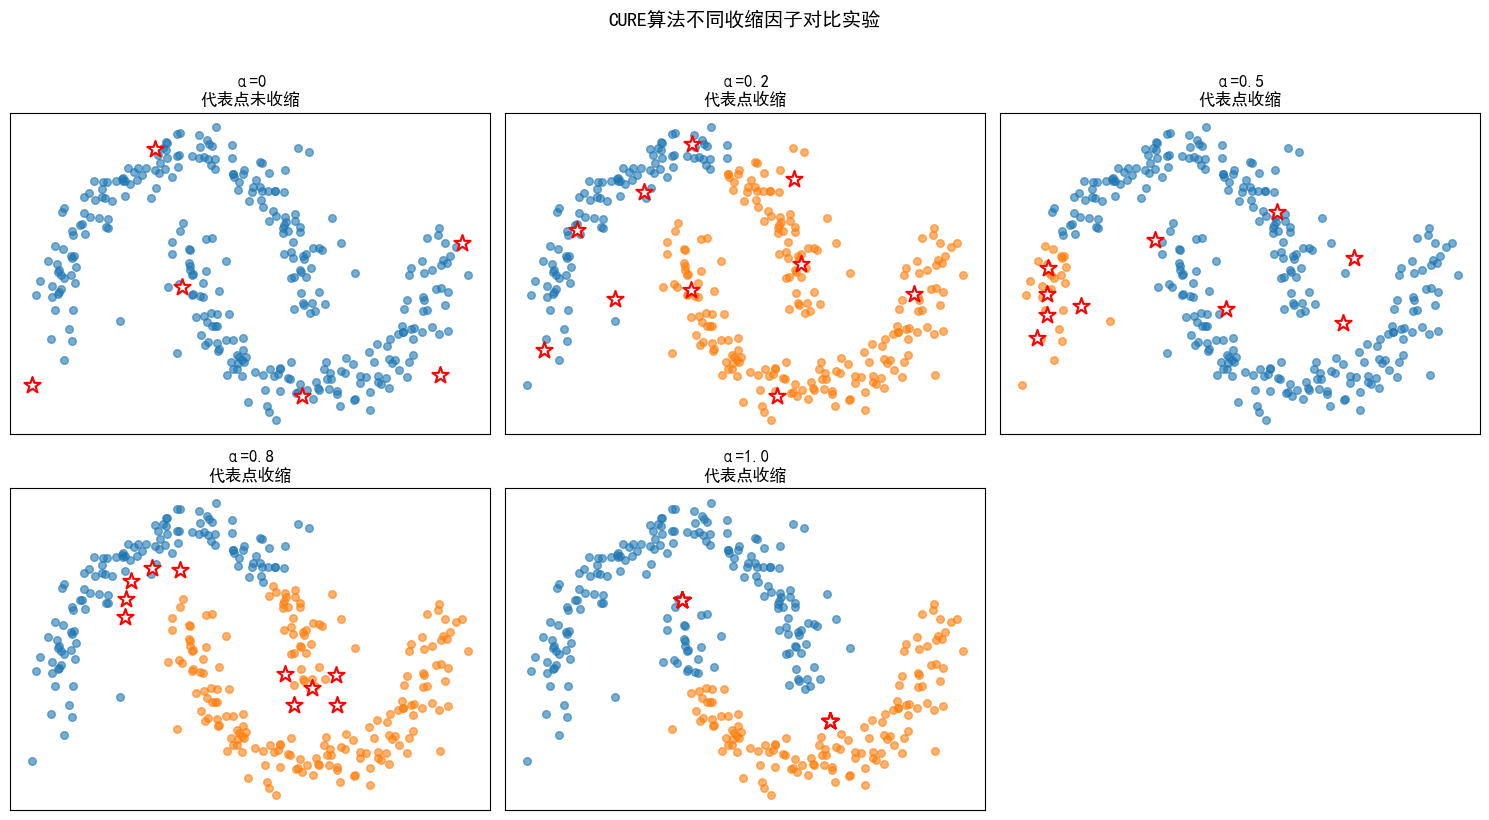

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from pyclustering.cluster import cure
from sklearn.preprocessing import StandardScaler

# 生成测试数据（半月形+噪声）
X, _ = make_moons(n_samples=300, noise=0.08, random_state=42)
X = StandardScaler().fit_transform(X)

# 添加噪声点
noise = np.random.uniform(low=-2, high=2, size=(20, 2))
X = np.vstack([X, noise])



# 设置不同收缩因子
alphas = [0, 0.2, 0.5, 0.8, 1.0]
plt.figure(figsize=(15, 8))

for i, alpha in enumerate(alphas, 1):
    # CURE聚类
    cure_instance = cure.cure(
        data=X.tolist(),
        number_cluster=2,
        number_represent_points=5,
        compression=alpha
    )
    cure_instance.process()
    clusters = cure_instance.get_clusters()
    
    # 绘制结果
    plt.subplot(2, 3, i)
    colors = ['#1f77b4', '#ff7f0e']
    for cluster_id, cluster in enumerate(clusters):
        plt.scatter(X[cluster, 0], X[cluster, 1], 
                    c=colors[cluster_id], s=30, alpha=0.6)
    
    # 绘制代表点（红色边框突出显示）
    representors = cure_instance.get_representors()
    for reps in representors:
        reps_array = np.array(reps)
        plt.scatter(reps_array[:, 0], reps_array[:, 1], 
                    c='white', marker='*', s=150,
                    edgecolor='red', linewidth=1.5)
    
    plt.title(f"α={alpha}\n代表点{'' if alpha>0 else '未'}收缩", fontsize=12)
    plt.xticks([]); plt.yticks([])

plt.suptitle("CURE算法不同收缩因子对比实验", fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

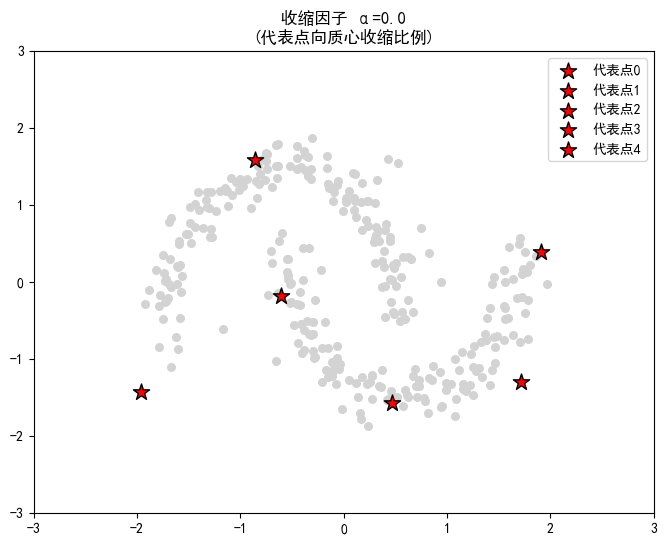

In [15]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# 准备动画
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlim(-3, 3); ax.set_ylim(-3, 3)

# 初始绘制
scatter = ax.scatter(X[:, 0], X[:, 1], c='lightgray', s=30)
rep_artists = [ax.scatter([], [], c='red', marker='*', s=150, 
                         edgecolor='black', label=f'代表点{i}') 
              for i in range(5)]
centroid_line = ax.plot([], [], 'k--', alpha=0.5)[0]
ax.legend()

# 动画更新函数
def update(alpha):
    cure_instance = cure.cure(
        data=X.tolist(),
        number_cluster=2,
        number_represent_points=5,
        compression=alpha
    )
    cure_instance.process()
    representors = cure_instance.get_representors()
    
    # 更新代表点位置
    for i, reps in enumerate(representors):
        if len(reps) > 0:
            reps_array = np.array(reps)
            rep_artists[i].set_offsets(reps_array)
            
            # 绘制代表点到质心的连线
            centroid = np.mean(reps_array, axis=0)
            centroid_line.set_data(
                [reps_array[:, 0].mean(), centroid[0]],
                [reps_array[:, 1].mean(), centroid[1]]
            )
    
    ax.set_title(f"收缩因子 α={alpha:.1f}\n(代表点向质心收缩比例)", fontsize=12)
    return rep_artists + [centroid_line]

# 生成动画
ani = FuncAnimation(fig, update, frames=np.linspace(0, 1, 20), interval=300)
HTML(ani.to_jshtml())  # 在Jupyter中显示

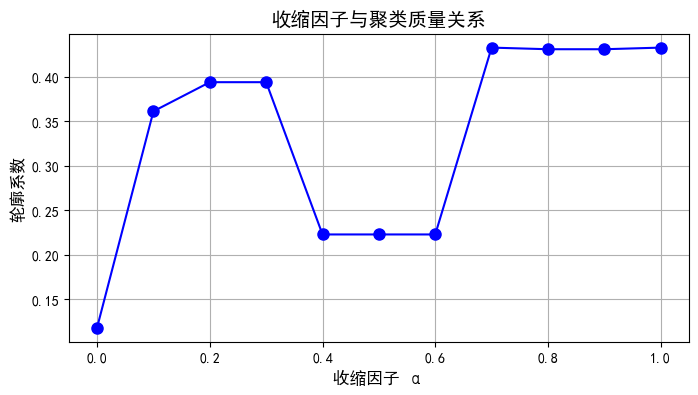

In [17]:
from sklearn.metrics import silhouette_score

alpha_range = np.linspace(0, 1, 11)
scores = []

for alpha in alpha_range:
    cure_instance = cure.cure(
        data=X.tolist(),
        number_cluster=2,
        number_represent_points=5,
        compression=alpha
    )
    cure_instance.process()
    labels = np.zeros(len(X))
    for cluster_id, cluster in enumerate(cure_instance.get_clusters()):
        labels[cluster] = cluster_id
    scores.append(silhouette_score(X, labels))

# 绘制曲线
plt.figure(figsize=(8, 4))
plt.plot(alpha_range, scores, 'bo-', markersize=8)
plt.xlabel("收缩因子 α", fontsize=12)
plt.ylabel("轮廓系数", fontsize=12)
plt.title("收缩因子与聚类质量关系", fontsize=14)
plt.grid(True)
plt.show()

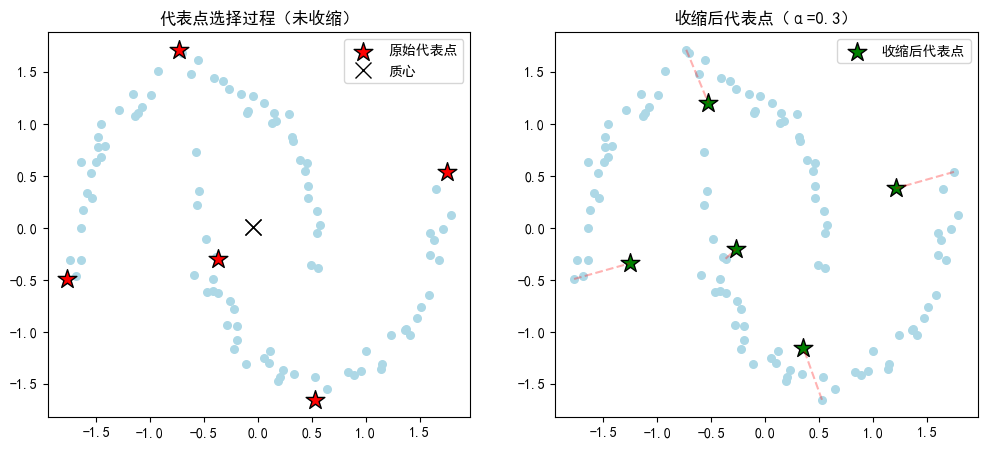

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler

# 生成数据
X, _ = make_moons(n_samples=200, noise=0.05, random_state=42)
X = StandardScaler().fit_transform(X)

# 模拟CURE代表点选择过程（假设已有一个簇）
cluster_points = X[:100]  # 取前100点作为示例簇
centroid = np.mean(cluster_points, axis=0)

def select_representatives(points, c=5):
    reps = []
    # 第一个代表点：距离质心最远的点
    distances = np.linalg.norm(points - centroid, axis=1)
    reps.append(points[np.argmax(distances)])
    
    # 迭代选择剩余代表点
    for _ in range(1, c):
        # 计算每个点到已选代表点的最小距离
        min_dists = []
        for p in points:
            dists = [np.linalg.norm(p - r) for r in reps]
            min_dists.append(min(dists))
        
        # 选择最小距离最大的点
        new_rep = points[np.argmax(min_dists)]
        reps.append(new_rep)
    return np.array(reps)

# 选择代表点（未收缩）
raw_reps = select_representatives(cluster_points, c=5)

# 收缩代表点（α=0.3）
alpha = 0.3
shrunk_reps = raw_reps + alpha * (centroid - raw_reps)

# 可视化
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c='lightblue', s=30)
plt.scatter(raw_reps[:, 0], raw_reps[:, 1], c='red', marker='*', s=200, 
            edgecolor='black', label='原始代表点')
plt.plot([centroid[0]]*2, [centroid[1]]*2, 'kx', markersize=12, label='质心')
plt.title("代表点选择过程（未收缩）")
plt.legend()

plt.subplot(122)
plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c='lightblue', s=30)
plt.scatter(shrunk_reps[:, 0], shrunk_reps[:, 1], c='green', marker='*', s=200,
            edgecolor='black', label='收缩后代表点')
for i in range(len(raw_reps)):
    plt.plot([raw_reps[i,0], shrunk_reps[i,0]], 
             [raw_reps[i,1], shrunk_reps[i,1]], 'r--', alpha=0.3)
plt.title(f"收缩后代表点（α={alpha}）")
plt.legend()
plt.show()